In [1]:
import pandas as pd
import numpy as np

In [2]:
prices = pd.read_parquet('../data/fund_prices.parq')

In [3]:
prices.head()

,fundName,fundSeries,installmentValue,bloombergCode,fecha
0,CAPITALISA-ACC,A,343.7506,BCHCAPT CI,2015-01-01
1,CAPITALISA-ACC,B,457.6202,BCHCACB CI,2015-01-01
2,CAPITALISA-ACC,C,777.8586,BCHCACC CI,2015-01-01
3,CAPITALISA-ACC,S,1000.0000,BCHCACS CI,2015-01-01
4,HORIZONTE,A,32368.2689,BCHEMPR CI,2015-01-01


In [19]:
series_mask = (prices['fundSeries'] == 'A') # | (prices['fundSeries'] == 'L')  !!! Adding Series==L only adds 2 observations
prices_a = prices[series_mask].reset_index(drop=True)
print(prices_a.shape)
prices_a.head()

(672876, 5)


,fundName,fundSeries,installmentValue,bloombergCode,fecha
0,CAPITALISA-ACC,A,343.7506,BCHCAPT CI,2015-01-01
1,HORIZONTE,A,32368.2689,BCHEMPR CI,2015-01-01
2,CAPITAL FINANCIERO,A,18796.8946,CICFINA CI,2015-01-01
3,CHILE ACCIONARIO,A,10379.9766,CICBURS CI,2015-01-01
4,RETORNO L.P. UF,A,1296.8599,LMLPUFI CI,2015-01-01


In [20]:
monthly_prices = prices_a.groupby([pd.Grouper(key='fecha', freq='1M'), 'fundName']).last()
print(monthly_prices.shape)
monthly_prices.loc['2015-01']

(21539, 3)


fundSeries  installmentValue  \
fecha      fundName                                                     
2015-01-31 A. CHILE CALIFICADO                    A         1000.0000   
           AC EMERGENTES                          A          898.5420   
           ACCIONES CHILENAS                      A          946.4151   
           ACCIONES LATAM                         A         1693.6139   
           ACCIONES NACIONALES                    A         1148.0399   
...                                             ...               ...   
           ZURICH MUNDO LATAM                     A          627.0096   
           ZURICH PATRIMONIO                      A         1376.8601   
           ZURICH RENTABILIDAD 80 GLOBAL          A               NaN   
           ZURICH SELECT GLOBAL                   A         1600.2140   
           ZURICH USA                             A          109.5651   

                                         bloombergCode  
fecha      fundName                                     
2015-01-31 A. CHILE CALIFICADO              ACCHICA CI  
           AC EMERGENTES                    CORPASI CI  
           ACCIONES CHILENAS                A18TERA CI  
           ACCIONES LATAM                   EUCAPIA CI  
           ACCIONES NACIONALES              SACNACA CI  
...                                                ...  
           ZURICH MUNDO LATAM               ZUMULAA CI  
           ZURICH PATRIMONIO                ZUPATRA CI  
           ZURICH RENTABILIDAD 80 GLOBAL          None  
           ZURICH SELECT GLOBAL             FONZURA CI  
           ZURICH USA                       ZUMUG3A CI  

[353 rows x 3 columns]

In [21]:
monthly_prices = monthly_prices['installmentValue'].unstack()
monthly_prices.head()

fundName,\tEA CONSERVADOR,A. CHILE CALIFICADO,AC EMERGENTES,ACCIONES CHILENAS,ACCIONES LATAM,ACCIONES NACIONALES,ACTIVA A,ACTIVA C,ACTIVA D,ACTIVA E,...,ZURICH EUROPA,ZURICH EXPERTO,ZURICH MUNDO EMERGENTE,ZURICH MUNDO EUROPEO,ZURICH MUNDO LATAM,ZURICH PATRIMONIO,ZURICH RENTABILIDAD 80 GLOBAL,ZURICH SELECT GLOBAL,ZURICH USA,ZURICH VALOR
fecha,,,,,,,,,,,,,,,,,,,,,
2015-01-31,NaN,1000.0,898.5420,946.4151,1693.6139,1148.0399,1268.8118,1101.4274,1144.2227,1168.5585,...,NaN,NaN,859.0242,882.7383,627.0096,1376.8601,NaN,1600.2140,109.5651,NaN
2015-02-28,NaN,1000.0,890.6828,971.2197,1722.7516,1186.1489,1290.0886,1115.8103,1153.7850,1169.5390,...,NaN,NaN,851.4763,910.1761,623.8134,1390.0569,NaN,1649.5923,114.8706,NaN
2015-03-31,NaN,1000.0,903.2852,966.3604,1635.1843,1166.7918,1289.0306,1117.2210,1153.3668,1169.4502,...,NaN,NaN,860.6974,917.4376,589.9754,1399.5459,NaN,1652.2255,112.6932,NaN
2015-04-30,NaN,1000.0,926.1299,976.9819,1717.7214,1188.5560,1277.8355,1102.7034,1139.2270,1171.1882,...,NaN,NaN,875.7397,909.6501,622.0686,1386.3464,NaN,1633.9630,113.1403,NaN
2015-05-31,NaN,1000.0,921.3001,957.9090,1632.6834,1169.4927,1283.8804,1107.4667,1146.2572,1172.4196,...,NaN,NaN,866.2293,923.5903,590.6232,1392.5871,NaN,1659.2681,114.3259,NaN


In [22]:
monthly_returns = monthly_prices.pct_change()
monthly_returns.replace([-np.inf, np.inf], np.nan, inplace=True)
monthly_returns.fillna(0, inplace=True)
monthly_returns.head()

fundName,\tEA CONSERVADOR,A. CHILE CALIFICADO,AC EMERGENTES,ACCIONES CHILENAS,ACCIONES LATAM,ACCIONES NACIONALES,ACTIVA A,ACTIVA C,ACTIVA D,ACTIVA E,...,ZURICH EUROPA,ZURICH EXPERTO,ZURICH MUNDO EMERGENTE,ZURICH MUNDO EUROPEO,ZURICH MUNDO LATAM,ZURICH PATRIMONIO,ZURICH RENTABILIDAD 80 GLOBAL,ZURICH SELECT GLOBAL,ZURICH USA,ZURICH VALOR
fecha,,,,,,,,,,,,,,,,,,,,,
2015-01-31,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2015-02-28,0.0,0.0,-0.008747,0.026209,0.017204,0.033195,0.016769,0.013058,0.008357,0.000839,...,0.0,0.0,-0.008787,0.031083,-0.005098,0.009585,0.0,0.030857,0.048423,0.0
2015-03-31,0.0,0.0,0.014149,-0.005003,-0.050830,-0.016319,-0.000820,0.001264,-0.000362,-0.000076,...,0.0,0.0,0.010830,0.007978,-0.054244,0.006826,0.0,0.001596,-0.018955,0.0
2015-04-30,0.0,0.0,0.025291,0.010991,0.050476,0.018653,-0.008685,-0.012994,-0.012260,0.001486,...,0.0,0.0,0.017477,-0.008488,0.054398,-0.009431,0.0,-0.011053,0.003967,0.0
2015-05-31,0.0,0.0,-0.005215,-0.019522,-0.049506,-0.016039,0.004731,0.004320,0.006171,0.001051,...,0.0,0.0,-0.010860,0.015325,-0.050550,0.004502,0.0,0.015487,0.010479,0.0


In [23]:
monthly_returns.T.to_csv('monthly_returns.csv')

In [39]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt
from collections import defaultdict

In [71]:
cl = AgglomerativeClustering(
    n_clusters=18,
    affinity='euclidean',
    linkage='ward',
    compute_distances=True
)
cl.fit(monthly_returns.T)

AgglomerativeClustering(compute_distances=True, n_clusters=18)

In [72]:
d = defaultdict(int)
for l in cl.labels_:
    d[l] += 1
d

defaultdict(int,
            {5: 42,
             8: 239,
             17: 26,
             16: 34,
             1: 9,
             13: 1,
             0: 35,
             4: 15,
             6: 12,
             3: 17,
             2: 21,
             11: 1,
             7: 3,
             12: 2,
             10: 2,
             9: 1,
             14: 1,
             15: 1})

In [73]:
cl = KMeans(n_clusters=18)
cl.fit(monthly_returns.T)

KMeans(n_clusters=18)

In [74]:
d = defaultdict(int)
for l in cl.labels_:
    d[l] += 1
d

defaultdict(int,
            {15: 48,
             0: 236,
             16: 38,
             14: 8,
             6: 1,
             10: 25,
             8: 38,
             7: 8,
             4: 11,
             5: 17,
             2: 1,
             12: 19,
             3: 2,
             9: 1,
             13: 6,
             11: 1,
             17: 1,
             1: 1})

In [122]:
funds = pd.read_parquet('../data/fund_data.parq')
funds.head()

,fundRUN,fundName,fundSeries,bloombergCode,APV,aafmCategory,svsCategory,svsCategoryId,currency,fixedRemuneration,variableRemuneration,investmentCommission,rescuedCommission
0,8001-2,CAPITALISA-ACC,A,BCHCAPT CI,NO,Accionario Nacional Large CAP,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,346510.0,0.0,0.0,0.0
1,8001-2,CAPITALISA-ACC,B,BCHCACB CI,SI,Accionario Nacional Large CAP,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,2899.0,0.0,0.0,0.0
2,8001-2,CAPITALISA-ACC,C,BCHCACC CI,NO,Accionario Nacional Large CAP,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,14858.0,0.0,0.0,0.0
3,8001-2,CAPITALISA-ACC,S,BCHCACS CI,NO,Accionario Nacional Large CAP,FM DE INVERSION EN INSTRUMENTOS DE CAPITALIZACION,5.0,P,0.0,0.0,0.0,0.0
4,8023-3,HORIZONTE,A,BCHEMPR CI,NO,"Fondos de Deuda > 365 Dias Nacional, Inversion...",FM DE INV.EN INST.DE DEUDA DE MEDIANO Y LARGO ...,3.0,P,2347098.0,0.0,0.0,5908.0


In [128]:
funds.shape

(4351557, 13)

In [124]:
funds['aafmCategory'].unique()

array(['Accionario Nacional Large CAP',
       'Fondos de Deuda > 365 Dias Nacional, Inversion en UF > 5 años',
       'Fondos de Deuda < 90 Dias Nacional',
       'Fondos de Deuda > 365 Dias Nacional, Inversión en UF < 3 años',
       'Fondos de Deuda < 365 Dias Nacional', 'Accionario Emergente',
       None, 'Accionario Nacional Otros', 'Accionario EEUU',
       'Accionario Desarrollado',
       'Fondos de Deuda > 365 Dias Nacional, Inversión en UF > 3 años',
       'Fondos de Deuda > 365 Dias Nacional, Inversion UF > 3 años y =<5',
       'Fondos de Deuda < 365 Dias Nacional en UF',
       'Accionario Europa Desarrollado', 'Accionario Asia Pacifico',
       'Fondos de Deuda > 365 Dias Nacional, Inversión en Pesos',
       'Accionario America Latina',
       'Fondos de Deuda < 90 Dias Internacional, Dolar',
       'Fondos de Deuda > 365 Dias Internacional, Mercados Emergentes',
       'Fondos de Deuda > 365 Dias Internacional, Mercados Internacionales',
       'Fondos de Deuda < 90 D

In [131]:
funds[['fundName', 'aafmCategory']].drop_duplicates().groupby('aafmCategory').count()

,fundName
aafmCategory,
Accionario America Latina,20
Accionario Asia Emergente,13
Accionario Asia Pacifico,1
Accionario Brasil,12
Accionario Desarrollado,18
Accionario EEUU,20
Accionario Emergente,22
Accionario Europa Desarrollado,13
Accionario Europa Emergente,2


In [132]:
prices.pivot_table(
    values='installmentValue',
    index=pd.Grouper(key='fecha', freq='1M'),
    columns=['fundName'],
    aggfunc=sum,
    fill_value=0
).shape

(74, 723)

In [133]:
funds[['fundName', 'aafmCategory']].drop_duplicates().groupby('aafmCategory').count().sum()

fundName    736
dtype: int64

In [81]:
dist = []
n_clusters = list(range(2, 50))
for k in n_clusters:
    cl = KMeans(n_clusters=k)
    cl.fit(monthly_returns.T)
    dist.append(cl.inertia_)

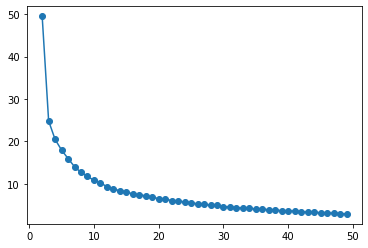

In [82]:
plt.plot(n_clusters, dist, 'o-')
plt.show()